<a href="https://colab.research.google.com/github/tassalor1/data_glacier/blob/main/Week6_File_Ingestion_and_Schema_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dask[complete]
!pip install modin[ray]
!pip install ray
!pip install pandas
!pip install pyyaml
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 KB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas
import time

# Pandas
start_time = time.time()
df_pandas = pandas.read_csv("Electric_Vehicle_Population_Data.csv")
pandas_read_time =  time.time() - start_time
print("Pandas read time:", pandas_read_time)

Pandas read time: 0.5766994953155518


In [3]:
import time
import modin.pandas as mp
import ray
ray.shutdown()
ray.init()

start_time = time.time()
df_modin = mp.read_csv("Electric_Vehicle_Population_Data.csv")
modin_read_time =  time.time() - start_time
print("Modin with Ray read time:", modin_read_time)

2023-04-05 10:12:18,953	INFO worker.py:1544 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


Modin with Ray read time: 3.074601411819458


Data types of partitions are different! Please refer to the troubleshooting section of the Modin documentation to fix this issue.


In [4]:
import dask.dataframe as dd

# Dask
start_time = time.time()
df_dask = dd.read_csv("Electric_Vehicle_Population_Data.csv", assume_missing=True)
dask_read_time = time.time() - start_time
print("Dask read time:", dask_read_time)

Dask read time: 0.027076005935668945


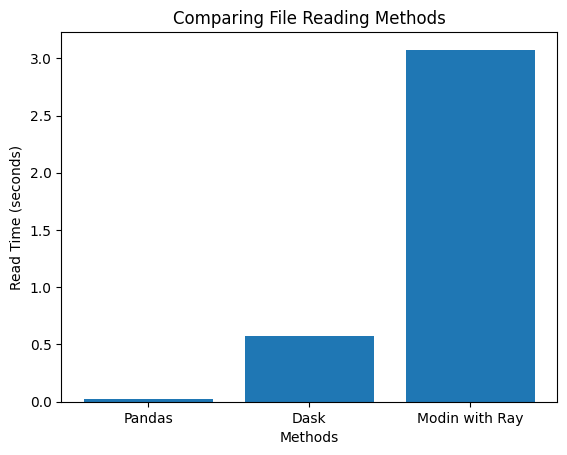

In [5]:
import matplotlib.pyplot as plt
 
  
# creating the dataset
methods = ["Pandas", "Dask", "Modin with Ray"]
read_times = [dask_read_time, pandas_read_time, modin_read_time]

plt.bar(methods, read_times)
plt.xlabel("Methods")
plt.ylabel("Read Time (seconds)")
plt.title("Comparing File Reading Methods")
plt.show()

In [6]:
df_dask

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
npartitions=1,,,,,,,,,,,,,,,,,
,object,object,object,object,float64,float64,object,object,object,object,float64,float64,float64,float64,object,object,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [7]:
df_dask.columns = df_dask.columns.str.replace('\W+ ', '')

In [8]:
df_dask

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFVEligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
npartitions=1,,,,,,,,,,,,,,,,,
,object,object,object,object,float64,float64,object,object,object,object,float64,float64,float64,float64,object,object,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [9]:
import yaml

schema = {
    "columns":df_dask.columns.tolist(),
    "seperator":"," 
}

In [17]:
# Read the YAML file
with open('schema.yaml', 'r') as f:
    yaml_schema = yaml.safe_load(f)

# Print the columns of the Dask DataFrame and the YAML schema
print("Columns of the file are:", df_dask.columns)
print("Columns of the YAML are:", yaml_schema['columns'])

Columns of the file are: Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFVEligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')
Columns of the YAML are: ['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFVEligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']


In [11]:
df_dask.to_csv("ingestion.gz", sep="|", index=False, compression="gzip")

['/content/ingestion.gz/0.part']

In [12]:
import os
num_rows = len(df_dask)
num_columns = len(df_dask.columns)
file_size = os.path.getsize("ingestion.gz")

print(f"Total number of rows: {num_rows}")
print(f"Total number of columns: {num_columns}")
print(f"File size: {file_size} bytes")

Total number of rows: 121978
Total number of columns: 17
File size: 4096 bytes
